<a href="https://colab.research.google.com/github/FiddiCoder/-FIA-Project/blob/main/ml_pipeline/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
#as rename 
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/imdb_top_1000.csv"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "imdb_top_1000.csv")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()

In [50]:
#load our data
datapath = os.path.join("dataset","")
movies = pd.read_csv(datapath + "imdb_top_1000.csv")

In [51]:
#distribution of data
print(movies.describe())

       IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06


#Scarsa correlazione tra voto di critica e pubblico, di conseguenza inutile fare clustering, ci limiteremo a fare una media flat dei valori null Metascore.

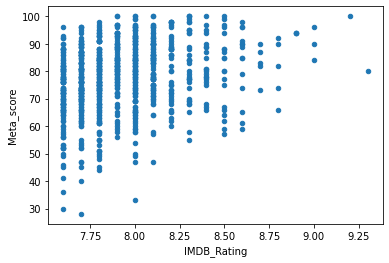

In [52]:
#scatterplot

movies.plot(x='IMDB_Rating', y='Meta_score', kind='scatter')
plt.show()

In [53]:
#start to look into missing data
print(movies.head(20))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

                                          Poster_Link  \
0   https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1   https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2   https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3   https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4   https://m.media-amazon.com/images/M/MV5BMWU4N2...   
5   https://m.media-amazon.com/images/M/MV5BNzA5ZD...   
6   https://m.media-amazon.com/images/M/MV5BNGNhMD...   
7   https://m.media-amazon.com/images/M/MV5BNDE4OT...   
8   https://m.media-amazon.com/images/M/MV5BMjAxMz...   
9   https://m.media-amazon.com/images/M/MV5BMmEzNT...   
10  https://m.media-amazon.com/images/M/MV5BN2EyZj...   
11  https://m.media-amazon.com/images/M/MV5BNWIwOD...   
12  https://m.media-amazon.com/images/M/MV5BOTQ5ND...   
13  https://m.media-amazon.com/images/M/MV5BZGMxZT...   
14  https://m.media-amazon.com/images/M/MV5BNzQzOT...   
15  https://m.media-amazon.com/images/M/MV5BY2NkZj...   
16  https://m.media-amazon.com/

In [54]:
#Eliminazione colonne inutili

movies = movies.drop('Poster_Link', axis=1)

# Prova 1

In [55]:
#check null data
print(movies.isnull().sum())


Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


# Data cleaning prova 1: Eliminazione colonna Gross, eliminazione righe Certificate, media Meta_score

In [56]:
movies = movies.dropna(axis=0, subset=['Certificate'])
print(movies.isnull().sum())

Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       112
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            114
dtype: int64


In [57]:
movies = movies.drop("Gross", axis=1)
print(movies.isnull().sum())

Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       112
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
dtype: int64


In [58]:
movies['Meta_score'] = movies['Meta_score'].fillna(movies['Meta_score'].mean())
print(movies.isnull().sum())

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
dtype: int64


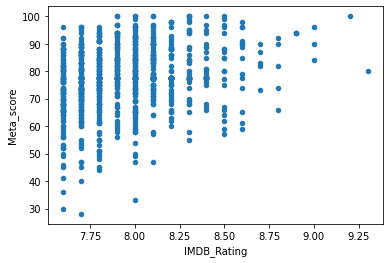

In [59]:
#scatterplot prova 1

movies.plot(x='IMDB_Rating', y='Meta_score', kind='scatter')
plt.show()

In [63]:
movies = movies.assign(target = 0)
#movies['target'] = movies['target'].sample(frac = 0.4).assign(target = 1) AGGIUSTAREEEEEE!!!

In [61]:
print(movies.head(500))

                                          Series_Title Released_Year  \
0                             The Shawshank Redemption          1994   
1                                        The Godfather          1972   
2                                      The Dark Knight          2008   
3                               The Godfather: Part II          1974   
4                                         12 Angry Men          1957   
5        The Lord of the Rings: The Return of the King          2003   
6                                         Pulp Fiction          1994   
7                                     Schindler's List          1993   
8                                            Inception          2010   
9                                           Fight Club          1999   
10   The Lord of the Rings: The Fellowship of the Ring          2001   
11                                        Forrest Gump          1994   
12                     Il buono, il brutto, il cattivo          